# Import Statements

In [1]:
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# One Hot Encoding the Target Classes

In [2]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]])


OneHotEncoder()

In [3]:
# Mount your Google Drive to Colab
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import os
from PIL import Image
import numpy as np

Mounted at /content/drive


In [4]:
# Mount your Google Drive to Colab
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import os
from PIL import Image
import numpy as np

# This cell updates result list for images with tumor
data = []
paths = []
result = []

for r, d, f in os.walk('/content/drive/MyDrive/brain_tumor_dataset/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:


# This cell updates result list for images with tumor
paths = []

for r, d, f in os.walk('/content/drive/MyDrive/brain_tumor_dataset/no'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())


In [6]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [7]:
result = np.array(result)
result = result.reshape(139,2)

# Splitting the Data into Training & Testing

In [8]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

# Model Building

In [9]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [10]:
y_train.shape

(111, 2)

In [11]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
3/3 [==============================] - 12s 3s/step - loss: 29.9844 - accuracy: 0.5405 - val_loss: 14.6651 - val_accuracy: 0.7143
Epoch 2/30
3/3 [==============================] - 11s 3s/step - loss: 11.2077 - accuracy: 0.6757 - val_loss: 55.8661 - val_accuracy: 0.5357
Epoch 3/30
3/3 [==============================] - 13s 4s/step - loss: 9.5087 - accuracy: 0.7928 - val_loss: 35.7155 - val_accuracy: 0.5714
Epoch 4/30
3/3 [==============================] - 9s 3s/step - loss: 1.8179 - accuracy: 0.8829 - val_loss: 4.3910 - val_accuracy: 0.8214
Epoch 5/30
3/3 [==============================] - 10s 3s/step - loss: 2.7723 - accuracy: 0.7928 - val_loss: 9.5763 - val_accuracy: 0.7500
Epoch 6/30
3/3 [==============================] - 11s 4s/step - loss: 0.9184 - accuracy: 0.9459 - val_loss: 22.9823 - val_accuracy: 0.5714
Epoch 7/30
3/3 [==============================] - 9s 3s/step - loss: 1.3477 - accuracy: 0.9099 - val_loss: 15.8734 - val_accuracy: 0.6786
Epoch 8/30
3/3 [=============

# Plotting Losses

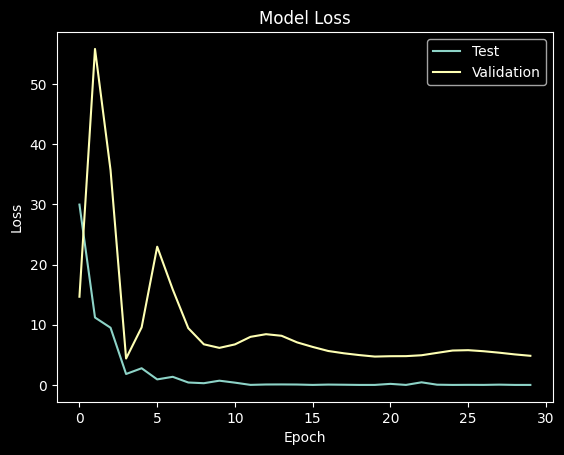

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

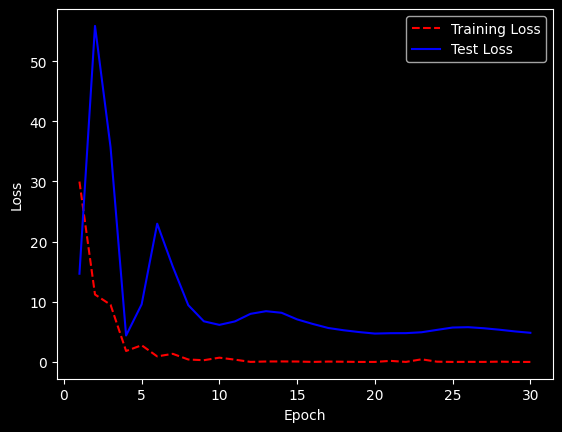

In [13]:
training_loss = history.history['loss']
test_loss = history.history['val_loss']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.savefig('/content/drive/My Drive/trainvstest.png')
plt.show();

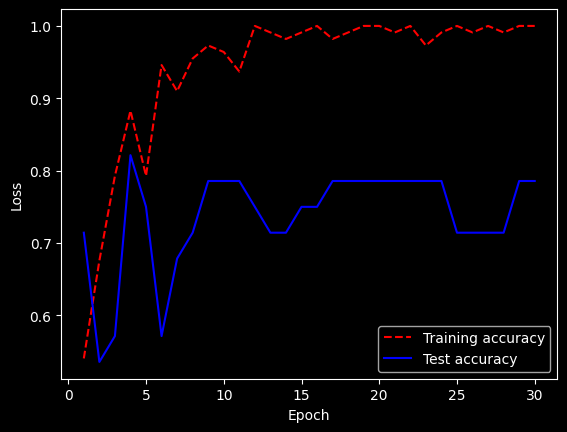

In [14]:
training_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_accuracy) + 1)

# Visualize accuracy history
plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')
plt.legend(['Training accuracy', 'Test accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.savefig('/content/drive/My Drive/trainvstest.png')
plt.show();

In [ ]:
accuracy = pd.DataFrame({"accuracy":history.history['accuracy'],
                      "Val Accuracy": history.history['val_accuracy']})
accuracy

In [ ]:
losses = pd.DataFrame({"Loss":history.history['loss'],
                      "Val loss": history.history['val_loss']})
losses

In [18]:
acc_loss = pd.DataFrame({"accuracy":history.history['accuracy'],
                      "Val Accuracy": history.history['val_accuracy'],
                      "Loss":history.history['loss'],
                      "Val loss": history.history['val_loss']})
acc_loss

,accuracy,Val Accuracy,Loss,Val loss
0,0.540541,0.714286,2.998444e+01,14.665129
1,0.675676,0.535714,1.120766e+01,55.866066
2,0.792793,0.571429,9.508670e+00,35.715450
3,0.882883,0.821429,1.817909e+00,4.391029
4,0.792793,0.750000,2.772292e+00,9.576293
5,0.945946,0.571429,9.184263e-01,22.982260
6,0.909910,0.678571,1.347688e+00,15.873418
7,0.954955,0.714286,4.022164e-01,9.437537
8,0.972973,0.785714,2.846263e-01,6.752720
9,0.963964,0.785714,7.040325e-01,6.160437


In [ ]:
# acc_loss.to_excel("/content/drive/My Drive/accloss.xlsx")

# Let's check the working of the model:


In [19]:
import numpy as np
import pandas as pd
from sklearn.metrics import multilabel_confusion_matrix, classification_report
import os

In [20]:
y_pred = model.predict(x_test)
y_pred = np.round(y_pred)

1/1 [==============================] - 1s 1s/step


In [21]:
cm = multilabel_confusion_matrix(y_test, y_pred)
print(cm)

[[[ 9  5]
  [ 1 13]]

 [[13  1]
  [ 5  9]]]


In [ ]:
y_train_pred = model.predict(x_train)
y_train_pred = np.round(y_train_pred)

4/4 [==============================] - 3s 521ms/step


In [ ]:
cm = multilabel_confusion_matrix(y_train, y_train_pred)
print(cm)

[[[52  3]
  [ 0 56]]

 [[56  0]
  [ 3 52]]]


In [ ]:
# y_test = np.argmax(y_test, axis=1)
# y_pred = np.argmax(y_pred, axis=1)
# cm = confusion_matrix(y_test, y_pred)

In [22]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

100.0% Conclusion: Its a Tumor


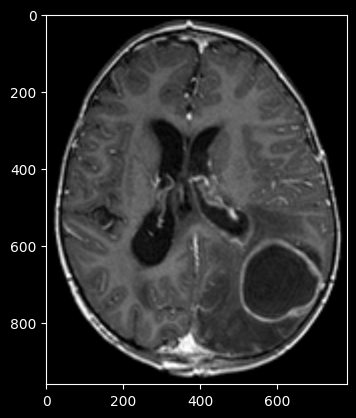

In [23]:
from matplotlib.pyplot import imshow
img = Image.open("/content/drive/MyDrive/brain_tumor_dataset/yes/Y257.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Conclusion: ' + names(classification))

100.0% Conclusion: No, Its not a tumor


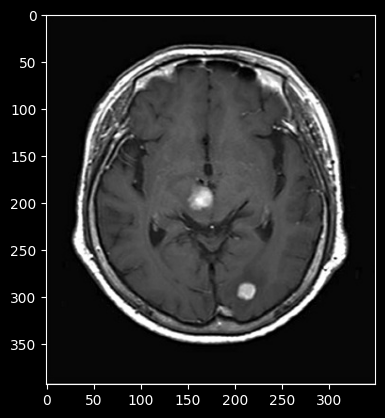

In [24]:
from matplotlib.pyplot import imshow
img = Image.open("/content/drive/MyDrive/brain_tumor_dataset/no/N17.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Conclusion: ' + names(classification))